## Imputation Pipeline 1: Using Mode Imputation (Filling the unknown (nan) values with the most frequent values). Inference using - Accuracy, Classification Report, Confusion Matrix, and ROC AUC Score.

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("/content/canbrs_dataset.csv")
df.head()

,ID,V1,var2,var3,var4,V5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,Outcome
0,A1,77,2010,w1,m1,509,98,0,Unknown,Unknown,Unknown,Unknown,3,Positive,Negative,Negative,Dead
1,A2,82,2010,w1,w5,501,98,0,Yes,No,No,No,3,Positive,Negative,Negative,Dead
2,A3,42,2011,w1,s3,509,98,0,Yes,No,Yes,Yes,1,Negative,Negative,Negative,Dead
3,A4,72,2012,w1,w5,509,98,0,No,No,No,Yes,1,Negative,Negative,Negative,Dead
4,A5,85,2013,w1,w5,508,98,0,Yes,No,No,No,4,Positive,Positive,Positive,Dead


In [25]:
data = df.copy()

In [26]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

In [27]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = data[col].fillna(data[col].mode()[0])
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

In [28]:
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# model = DecisionTreeClassifier(random_state=42) ## Accuracy - 0.85
# model.fit(X_train, y_train)

In [30]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# model = SVC(random_state=42) ## Accuracy - 0.82
# model.fit(X_train, y_train)

In [32]:
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) ## Accuracy - 0.90
# model.fit(X_train, y_train)

In [33]:
# model = LogisticRegression(max_iter=1000, random_state=42) ## Accuracy -> 0.85
# model.fit(X_train, y_train)

Accuracy: 0.9133333333333333

Classification Report:
               precision    recall  f1-score   support

       Alive       0.78      0.72      0.75       108
        Dead       0.94      0.96      0.95       492

    accuracy                           0.91       600
   macro avg       0.86      0.84      0.85       600
weighted avg       0.91      0.91      0.91       600



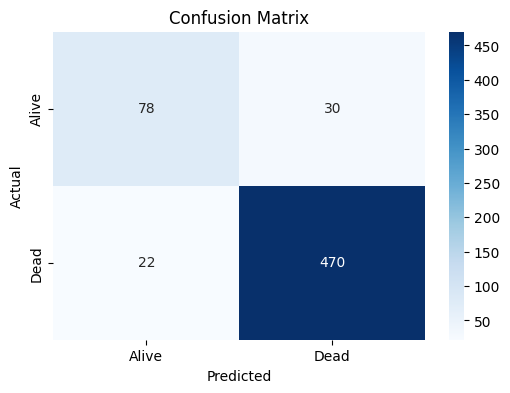

ROC AUC Score: 0.9464957844022884


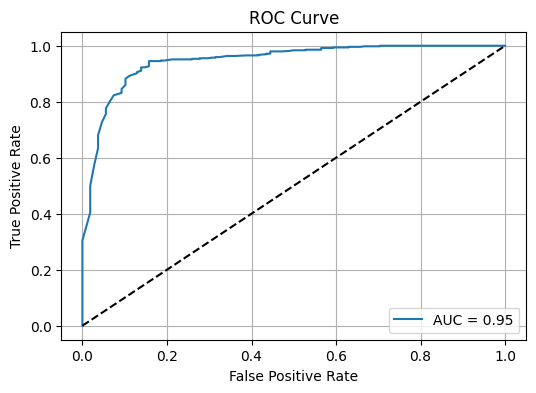

In [34]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Imputation Pipeline 2: Using Random Imputation. Inference using - Accuracy, Classification Report, Confusion Matrix, and ROC AUC Score.

In [35]:
data = df.copy()

In [36]:
le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}
np.random.seed(42)

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].apply(lambda x: np.random.choice(data[col].dropna()) if pd.isnull(x) else x)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].apply(lambda x: np.random.choice(data[col].dropna()) if pd.isnull(x) else x)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) ## Accuracy - 0.90
# model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

       Alive       0.78      0.70      0.74       108
        Dead       0.94      0.96      0.95       492

    accuracy                           0.91       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.91      0.91      0.91       600



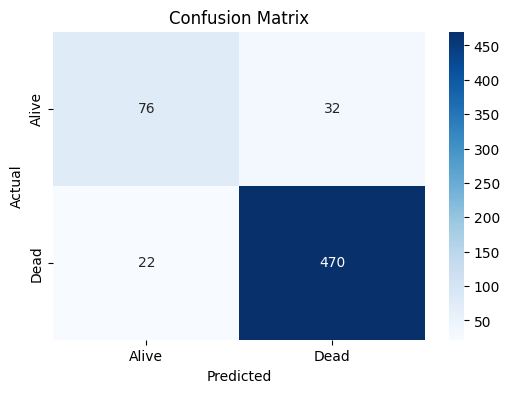

ROC AUC Score: 0.9463452273411623


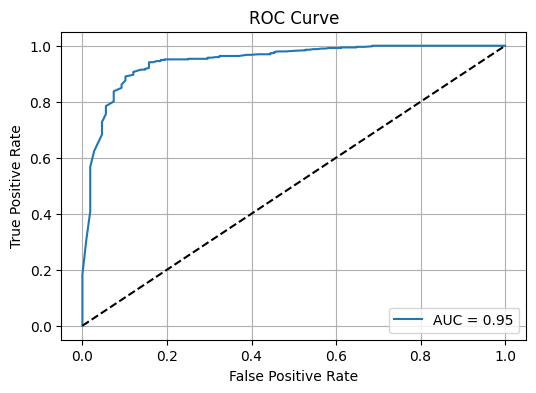

In [42]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Imputation Pipeline 3: Using Iterative Imputation (MICE Technique) on both categorical and numerical categories. Inference using - Accuracy, Classification Report, Confusion Matrix, and ROC AUC Score.

In general Iterative Imputation is used for numerical categories only. In our case we don't have any imputation needed on numerical categories. Therefore, I have applied transformation on both categorical and numerical features.

In [58]:
data = df.copy()

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

np.random.seed(42)

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

all_cols = data.columns
imputer = IterativeImputer(random_state=42)
data_imputed = imputer.fit_transform(data)

data = pd.DataFrame(data_imputed, columns=all_cols)

for col in cat_cols:
    data[col] = data[col].round(0).astype(int)


if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91666
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) ## Accuracy - 0.90333
# model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.9116666666666666


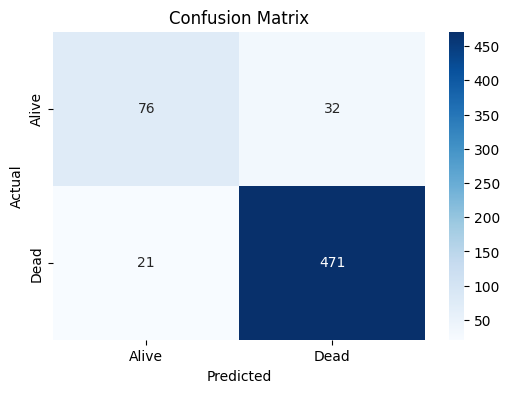

ROC AUC Score: 0.9458182776272207


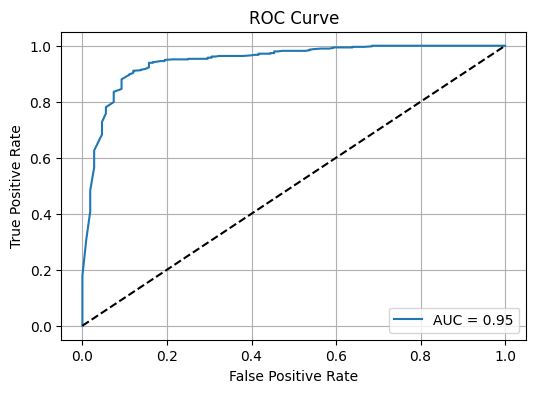

In [57]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Imputation Pipeline 4: Using KNN Imputation Technique. Inference using - Accuracy, Classification Report, Confusion Matrix, and ROC AUC Score.

In [77]:
data = df.copy()

In [78]:
from sklearn.impute import KNNImputer

le_outcome = LabelEncoder()
data['Outcome'] = le_outcome.fit_transform(data['Outcome'])

label_encoders = {}

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

data = data.round().astype(int)

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = RandomForestClassifier(random_state=42) ## Accuracy - 0.91666
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9116666666666666

Classification Report:
               precision    recall  f1-score   support

       Alive       0.78      0.70      0.74       108
        Dead       0.94      0.96      0.95       492

    accuracy                           0.91       600
   macro avg       0.86      0.83      0.84       600
weighted avg       0.91      0.91      0.91       600



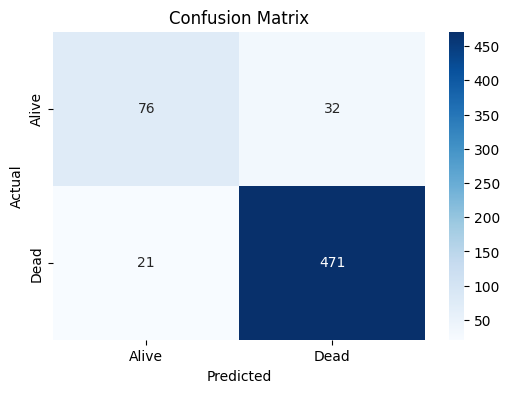

ROC AUC Score: 0.9458182776272207


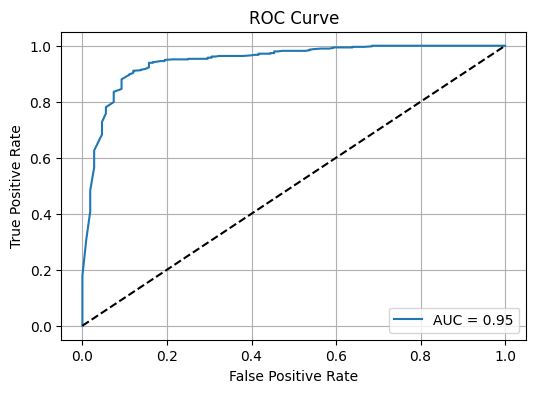

In [80]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_outcome.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_outcome.classes_, yticklabels=le_outcome.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

if y_pred_proba is not None:
    auc_score = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    print("ROC AUC Score:", auc_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("ROC AUC Score and Curve not available (model does not support probability estimates).")

## Inference from the Imputation Pipelines Notebook

Best Performing Model: Random Forest Classifier
Performance Metrics

- Accuracy: 91.3%

- ROC AUC Score: 0.946

- Classification Report:
  - Class "Alive"
    - Precision: 0.78
    - Recall: 0.72
    - F1-score: 0.75
  - Class "Dead"
    - Precision: 0.94
    - Recall: 0.96
    - F1-score: 0.95
  - Macro Avg F1: 0.85
  - Weighted Avg F1: 0.91

- Based on 4 pipelines, the current scenario depicts that Random Forest Classifier outperforms the other 4 models in our ensemble learning technique along with either MICE or KNN Imputation Method (both are giving same results as of now). Currently, it is the best candidate for our therapeautic outcome prediction.
- Further, it seems pretty intuitive that the model is almost aiming for perfection in the `Dead` class, but fails to perform that well in the `Alive` class.
- This type of imbalance will be curated by improving the sensitivity for minority classes. This will be further inducted into the process through SMOTE or class weight tuning.